# Breast Cancer Detection

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV

pd.set_option('display.max_columns', None)

In [2]:
# import dataset
data = pd.read_csv('data.csv')

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## EDA

In [3]:
data = data.drop(columns=['Unnamed: 32', 'id'])

data['diagnosis'] = data['diagnosis'].map({ 'M': 1, 'B': 0 })

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
x = data.drop(columns=['diagnosis'])
y = data['diagnosis']

x.shape, y.shape

((569, 30), (569,))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

y_train.value_counts(), y_test.value_counts()

(diagnosis
 0    286
 1    169
 Name: count, dtype: int64,
 diagnosis
 0    71
 1    43
 Name: count, dtype: int64)

In [6]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_train.columns)

x_train.describe().round(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000
mean,0.315,0.320,0.313,0.208,0.389,0.288,0.208,0.240,0.344,0.270,0.105,0.186,0.099,0.062,0.179,0.176,0.083,0.225,0.237,0.101,0.276,0.360,0.267,0.162,0.410,0.248,0.219,0.392,0.264,0.244
std,0.173,0.144,0.173,0.152,0.126,0.180,0.186,0.189,0.147,0.152,0.103,0.120,0.098,0.088,0.104,0.140,0.081,0.119,0.153,0.096,0.176,0.162,0.170,0.141,0.157,0.170,0.167,0.224,0.124,0.151
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.197,0.218,0.193,0.107,0.300,0.149,0.069,0.101,0.241,0.162,0.045,0.105,0.042,0.021,0.114,0.079,0.038,0.146,0.137,0.046,0.160,0.241,0.151,0.073,0.294,0.129,0.093,0.220,0.183,0.136
50%,0.275,0.303,0.271,0.164,0.379,0.245,0.144,0.166,0.334,0.243,0.077,0.162,0.072,0.033,0.159,0.136,0.066,0.210,0.202,0.080,0.230,0.352,0.220,0.115,0.406,0.201,0.181,0.339,0.249,0.212
75%,0.394,0.402,0.397,0.256,0.469,0.383,0.310,0.367,0.422,0.340,0.129,0.239,0.118,0.069,0.216,0.226,0.107,0.277,0.286,0.125,0.356,0.471,0.357,0.200,0.509,0.345,0.309,0.554,0.318,0.314
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## ML Model

Defined 3 models
>logistic: 0.960 (+/-0.016)
>knn: 0.954 (+/-0.025)
>rf: 0.956 (+/-0.023)

Rank=1, Name=logistic, Score=0.960 (+/-0.016)
Rank=2, Name=rf, Score=0.956 (+/-0.023)
Rank=3, Name=knn, Score=0.954 (+/-0.025)


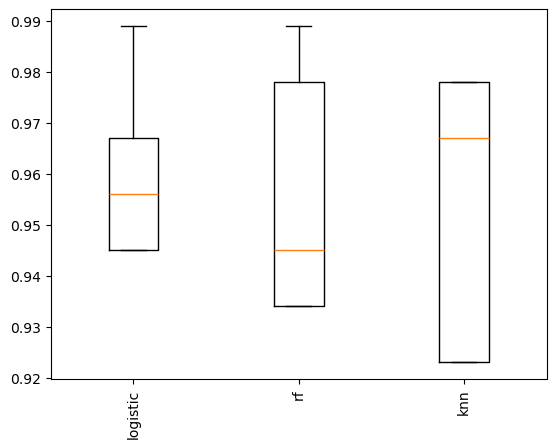

In [7]:
def define_models(models=dict()):
    # linear model
    models['logistic'] = LogisticRegression()
    # non-linear model
    models['knn'] = KNeighborsClassifier()
    # ensemble model
    models['rf'] = RandomForestClassifier()
    print('Defined {} models'.format(len(models)))
    return models

def evaluate_models(x, y, models):
    results=dict()
    for name, model in models.items():
        scores = cross_val_score(model, x, y, scoring='accuracy', cv=5, n_jobs=-1)
        if scores is not None:
            results[name] = scores
            mean_score, std_score = np.mean(scores), np.std(scores)
            print('>{}: {:.3f} (+/-{:.3f})'.format(name, mean_score, std_score))
        else:
            print('>{}: error'.format(name))
    return results

def summarize_results(results):
    if len(results) == 0:
        print('no results')
        return
    n = min(10, len(results))
    mean_scores = [(k, np.mean(v)) for k,v in results.items()]
    mean_scores = sorted(mean_scores, key=lambda x: x[1])
    mean_scores = list(reversed(mean_scores))
    names = [x[0] for x in mean_scores[:n]]
    scores = [results[x[0]] for x in mean_scores[:n]]
    print()
    for i in range(n):
        name = names[i]
        mean_score, std_score = np.mean(results[name]), np.std(results[name])
        print('Rank={}, Name={}, Score={:.3f} (+/-{:.3f})'.format(i+1, name, mean_score, std_score))
    plt.boxplot(scores, labels=names)
    plt.xticks(rotation='vertical', ha='center')

models = define_models()

results = evaluate_models(x_train, y_train, models)

summarize_results(results)

In [8]:
param_grid = [{
    'penalty' : ['l2', None],
    'C' : np.arange(0.1, 1.1, 0.1),
    'fit_intercept' : [True, False]
}]

optimal_params = RandomizedSearchCV(LogisticRegression(),
                                    param_grid,
                                    n_iter=40,
                                    cv=5,
                                    scoring='accuracy',
                                    n_jobs=-1,
                                    random_state=0)

optimal_params.fit(x_train, y_train.values.ravel())

print(optimal_params.best_params_)

print(optimal_params.best_score_)

{'penalty': 'l2', 'fit_intercept': True, 'C': 1.0}
0.9604395604395606


In [9]:
lr = LogisticRegression(
    penalty = 'l2',
    fit_intercept = False,
    C = 0.2
)

lr.fit(x_train, y_train)

predictions = lr.predict(x_test)

score = accuracy_score(predictions, y_test)
print('RF model accuracy on test set: {:.5f}'.format(score))

RF model accuracy on test set: 0.88596


## Features Reduction

In [10]:
selector = RFECV(estimator=lr, cv=5, step=1)
selector.fit(x_train, y_train.values.ravel())

selected_features = x_train.columns[selector.support_]

selected_features

Index(['smoothness_mean', 'concavity_mean', 'concave points_mean',
       'fractal_dimension_mean', 'smoothness_se', 'symmetry_se', 'area_worst',
       'concave points_worst'],
      dtype='object')

In [11]:
x_train_sel = x_train[selected_features]
x_test_sel = x_test[selected_features]

x_train_sel.shape, x_test_sel.shape

((455, 8), (114, 8))

In [12]:
lr.fit(x_train_sel, y_train)

predictions = lr.predict(x_test_sel)

score = accuracy_score(predictions, y_test)
print('RF model accuracy on test set: {:.5f}'.format(score))

RF model accuracy on test set: 0.91228
